In [2]:
import shap
import pickle
import pandas as pd
import matplotlib as plt
from sklearn.inspection import PartialDependenceDisplay

/Users/winke/opt/anaconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Loading dataframe
df = pd.read_csv('weekly_new.csv')
df = df[['counts_week', 'country', 'dist_to_greenspace', 'dist_to_edu', 'bike_points', 'bus_stops', 'business_shops', 'traffic_signals', 'cycle_length', 'dem_std',
         'lst_mean', 'pop_sum', 'build_area', 'ndvi_mean', 'dist_to_bikePOI', 'dist_to_train', '3_way_int_count', 'median_speed', 'orientation_entropy']]

country = df
# country = df[df['country'] == 'Netherlands']
# country = df[df['country'] == 'USA']
# country = df[df['country'] == 'UK']

X = country.drop(['counts_week', 'country'], axis=1)

In [9]:
#Opening the model for illustration
model_path = '/Users/winke/Documents/University/Thesis/Predicting_cycling/models/saved_models/NL_xgb.pkl'

# Load the model from the file
with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)

ValueError: All entries of features must be less than len(feature_names) = 17, got 17.

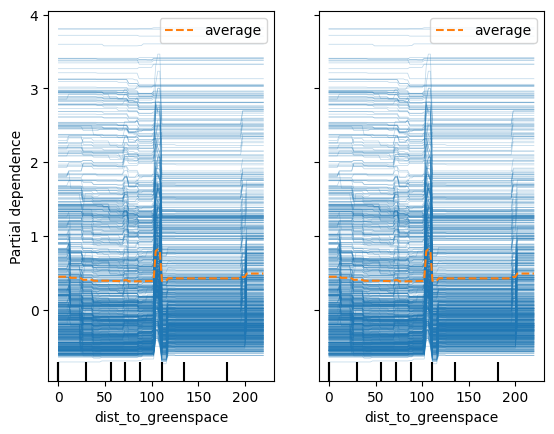

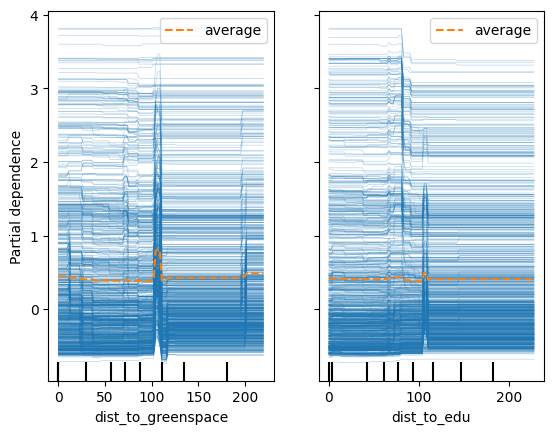

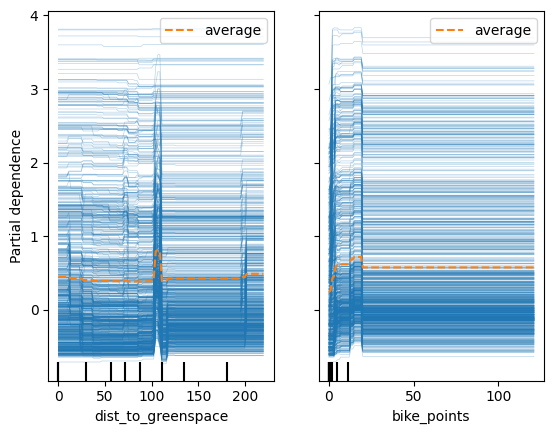

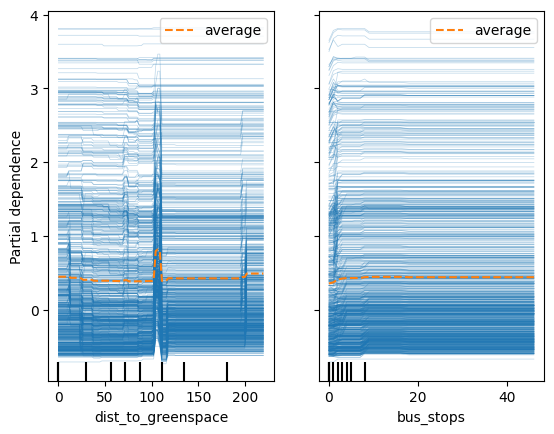

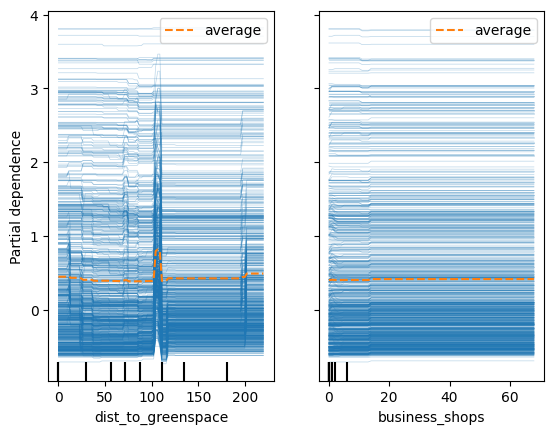

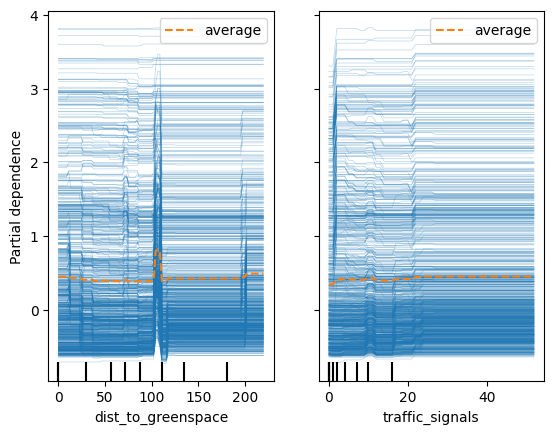

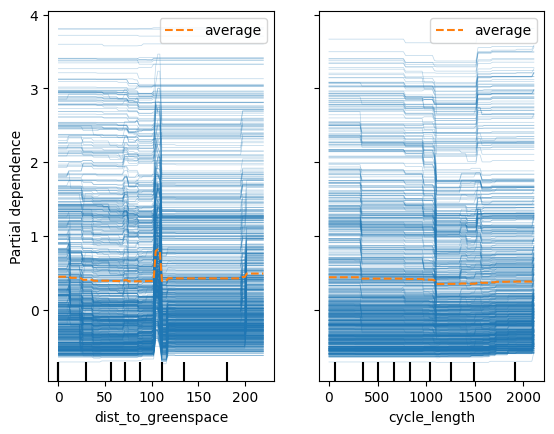

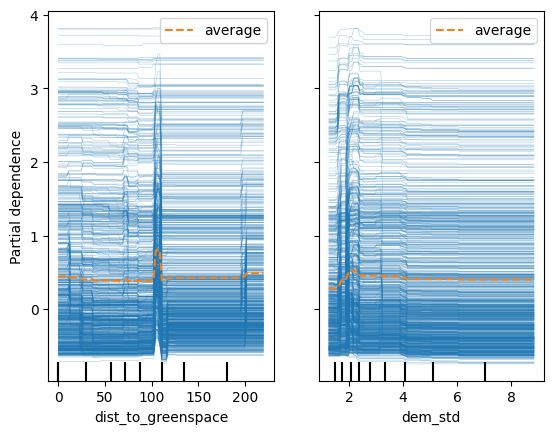

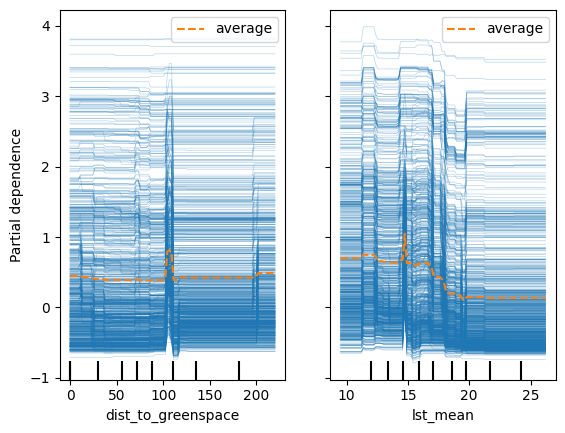

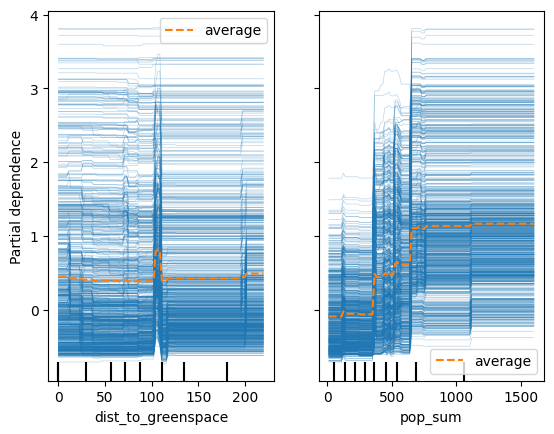

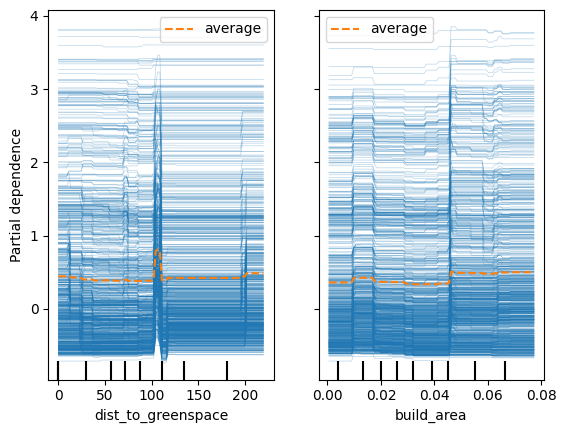

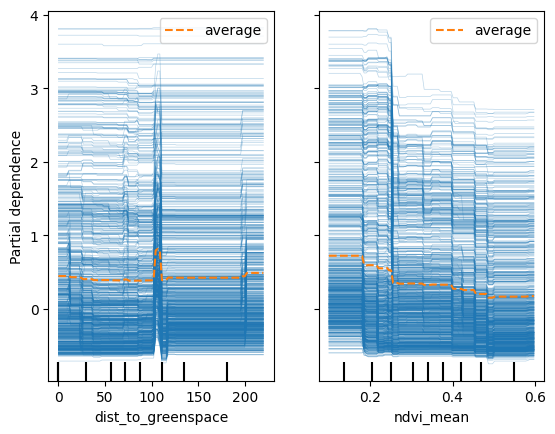

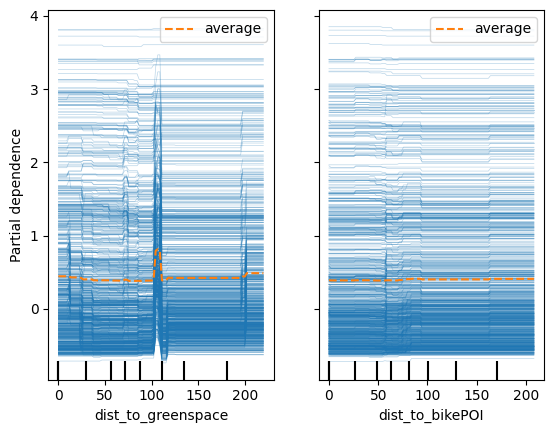

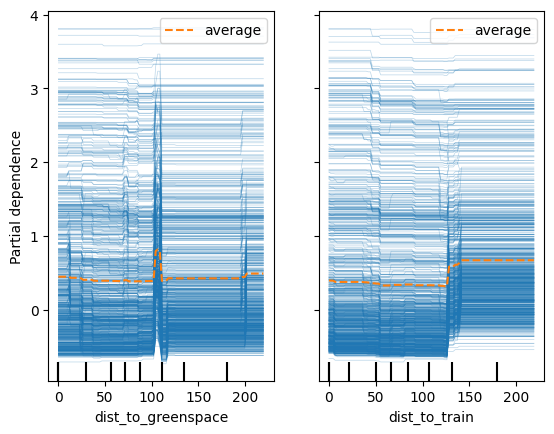

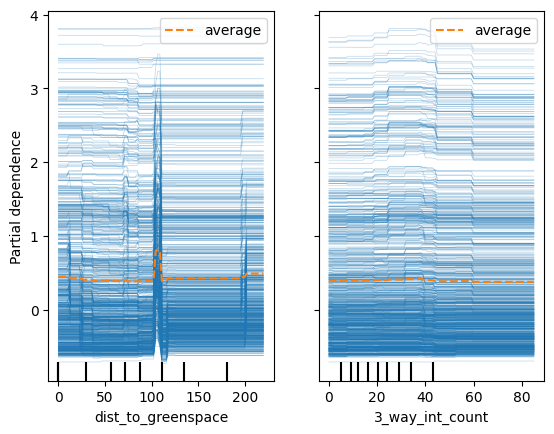

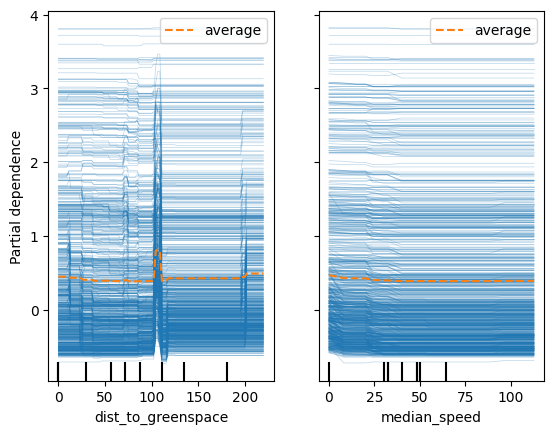

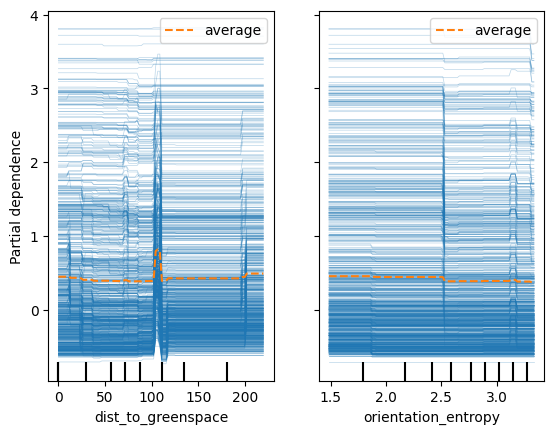

In [10]:
#Iterate through variables and print the ICE plot for each of them
for f in range(len(df.columns)):
    features = [0,f]

    #Generate ICE plots for each variable
    PartialDependenceDisplay.from_estimator(loaded_model, X, features, kind='both')